In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Converting string values into ints

In [6]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [7]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [8]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [9]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [10]:
# Converting country from str to int using LabelEncoder

df.country.fillna(df.country.mode().to_string(), inplace=True)    # Filling Null values with the most common value in the dataset - here PRT for Portugal
le = LabelEncoder()
df.country = le.fit_transform(df.country)
df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [11]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [12]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [13]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [14]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [15]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [16]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [17]:
# Creating a new column: net_cancelled. 
# It contains 1 if the guest has cancelled more bookings in the past than the number of booking she did not cancel, otherwise 0

df['net_cancelled'] = 0
df.loc[ df.previous_cancellations > df.previous_bookings_not_canceled, 'net_cancelled'] = 1


In [18]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [19]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [20]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [21]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [22]:
df.reservation_status.unique() 

# This column will not be taken into the calculation since it is almost redundand to is_cancelled which we want to predict.

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [23]:
# Creating a new feature: room.
# If a guest does not get the reserved room it might raise the probability that she cancels the reservation.

df['room'] = 0
df.loc[df.reserved_room_type == df.assigned_room_type , 'room'] = 1

In [24]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [25]:
# Filling missing values in children with the mean

df.children.fillna(round(df.children.mean()), inplace = True)

# Filling missing values with mode

df['agent'] = df['agent'].fillna(df['agent'].mean())
df['company'] = df['company'].fillna(df['company'].mean())

# Converting unneccessary float types into int types

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [26]:
# Adults, babies and children cant be 0 at same time, so these 180 rows need to be dropped

df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# There are still some unusual bookings left: traveling children and babies without adults

<AxesSubplot:>

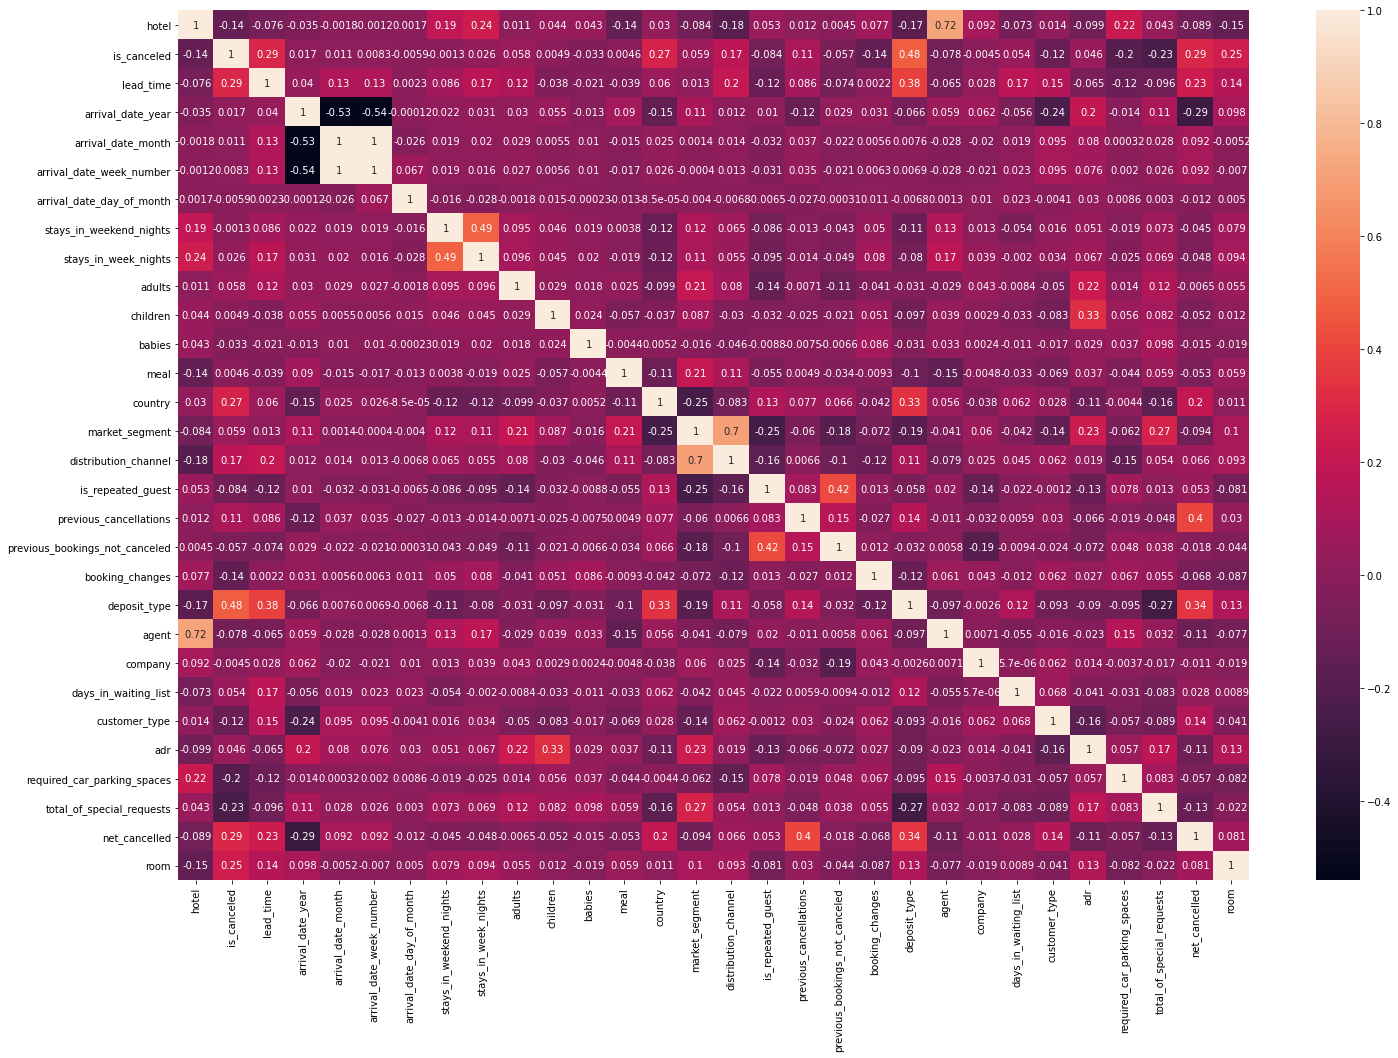

In [27]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [28]:
#Variance of the data
df.var()

hotel                                 0.223085
is_canceled                           0.233300
lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  0.801927
country                            2023.411409
market_segment                        1.602172
distribution_channel                  0.458395
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
booking_changes                       0.407688
deposit_type                          0.430259
agent        

In [29]:
# Correlation depending on is_canceled

df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
deposit_type                      0.480483
net_cancelled                     0.292888
lead_time                         0.292876
country                           0.272496
room                              0.246768
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
agent                             0.078010
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_dat

In [30]:
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type', 
             'previous_cancellations', 'previous_bookings_not_canceled'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [31]:
# How many uncanceled (0) or canceled (1) records does the dataset contain?

print('Distribution is canceled (1) or not (0): \n' + str(pd.Series(y).value_counts()))
print('In Percent: \n' + str(pd.Series(y).value_counts() / pd.Series(y).count() * 100))

Distribution is canceled (1) or not (0): 
0    75011
1    44199
dtype: int64
In Percent: 
0    62.923412
1    37.076588
dtype: float64


In [32]:
# The dataset is obviously very imbalanced. 
# A prediction with a high accuracy and Kappa is therefor only possible with a lot of try and error in feature optimization. 
# A possible solution: Oversampling!

In [33]:
# Oversampling: Balances the imbalanced dataset out by creating more samples with "canceled data" for better prediction results. 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [34]:
# Scaling 

X_scaled = StandardScaler().fit_transform(X_resampled)

# Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size = 0.2, random_state = 0)

In [35]:
# After Oversampling

print('Distribution after Oversampling: \n' + str(pd.Series(y_resampled).value_counts()))

Distribution after Oversampling: 
1    75011
0    75011
dtype: int64


In [36]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression is : 0.7745042492917847
Confusion Matrix : 
[[12061  2957]
 [ 3809 11178]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     15018
           1       0.79      0.75      0.77     14987

    accuracy                           0.77     30005
   macro avg       0.78      0.77      0.77     30005
weighted avg       0.78      0.77      0.77     30005

C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resul

In [37]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5489815542023257

In [38]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

Accuracy Score of Random Forest is : 0.9324112647892018
Confusion Matrix : 
[[13774  1244]
 [  784 14203]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15018
           1       0.92      0.95      0.93     14987

    accuracy                           0.93     30005
   macro avg       0.93      0.93      0.93     30005
weighted avg       0.93      0.93      0.93     30005



In [39]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.8648266673566674

In [40]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.9033827695384102
Confusion Matrix : 
[[13169  1849]
 [ 1050 13937]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     15018
           1       0.88      0.93      0.91     14987

    accuracy                           0.90     30005
   macro avg       0.90      0.90      0.90     30005
weighted avg       0.90      0.90      0.90     30005



In [41]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.8067759647612581

Maximum:  0.9824120603015075
Mean:  0.8116929103958078


<AxesSubplot:>

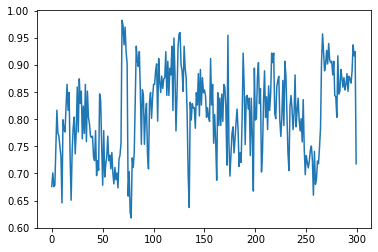

In [42]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=300)
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()


In [43]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of Ada Boost Classifier is : 0.8476587235460756
Confusion Matrix : 
[[12286  2732]
 [ 1839 13148]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     15018
           1       0.83      0.88      0.85     14987

    accuracy                           0.85     30005
   macro avg       0.85      0.85      0.85     30005
weighted avg       0.85      0.85      0.85     30005



In [44]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6953358579020931

In [45]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.839126812197967
Confusion Matrix : 
[[12728  2290]
 [ 2537 12450]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     15018
           1       0.84      0.83      0.84     14987

    accuracy                           0.84     30005
   macro avg       0.84      0.84      0.84     30005
weighted avg       0.84      0.84      0.84     30005



In [46]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.678247807982761

In [47]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.8404265955674054
Confusion Matrix : 
[[12659  2359]
 [ 2429 12558]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     15018
           1       0.84      0.84      0.84     14987

    accuracy                           0.84     30005
   macro avg       0.84      0.84      0.84     30005
weighted avg       0.84      0.84      0.84     30005



In [48]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.6808513119754771

In [49]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.8698883519413431
Confusion Matrix : 
[[12826  2192]
 [ 1712 13275]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87 

In [50]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.7397850276978359

In [51]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.4589474	total: 230ms	remaining: 22.7s
1:	learn: 0.3993435	total: 296ms	remaining: 14.5s
2:	learn: 0.3704396	total: 369ms	remaining: 11.9s
3:	learn: 0.3582795	total: 436ms	remaining: 10.5s
4:	learn: 0.3511704	total: 507ms	remaining: 9.64s
5:	learn: 0.3453774	total: 583ms	remaining: 9.13s
6:	learn: 0.3379324	total: 664ms	remaining: 8.82s
7:	learn: 0.3278971	total: 735ms	remaining: 8.46s
8:	learn: 0.3260514	total: 814ms	remaining: 8.23s
9:	learn: 0.3238217	total: 870ms	remaining: 7.83s
10:	learn: 0.3212087	total: 926ms	remaining: 7.49s
11:	learn: 0.3190975	total: 983ms	remaining: 7.21s
12:	learn: 0.3152201	total: 1.04s	remaining: 6.96s
13:	learn: 0.3134005	total: 1.09s	remaining: 6.73s
14:	learn: 0.3112521	total: 1.15s	remaining: 6.51s
15:	learn: 0.3089294	total: 1.2s	remaining: 6.32s
16:	learn: 0.3081249	total: 1.26s	remaining: 6.13s
17:	learn: 0.3063807	total: 1.31s	remaining: 5.96s
18:	learn: 0.3058048	total: 1.36s	remaining: 5.81s
19:	learn: 0.3044

In [52]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.7547813898063098

In [53]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Cat Boost Classifier is : 0.9304449258456924
Confusion Matrix : 
[[13931  1087]
 [ 1000 13987]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15018
           1       0.93      0.93      0.93     14987

    accuracy                           0.93     30005
   macro avg       0.93      0.93      0.93     30005
weighted avg       0.93      0.93      0.93     30005



In [54]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.8608905366544347

In [55]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of Cat Boost Classifier is : 0.8698550241626396
Confusion Matrix : 
[[12798  2220]
 [ 1685 13302]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     15018
           1       0.86      0.89      0.87     14987

    accuracy                           0.87     30005
   macro avg       0.87      0.87      0.87     30005
weighted avg       0.87      0.87      0.87     30005



In [56]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.7397193600868011

In [57]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.5
0:	learn: 0.4589474	total: 61.2ms	remaining: 6.06s
1:	learn: 0.3993435	total: 118ms	remaining: 5.76s
2:	learn: 0.3704396	total: 172ms	remaining: 5.57s
3:	learn: 0.3582795	total: 294ms	remaining: 7.05s
4:	learn: 0.3511704	total: 364ms	remaining: 6.91s
5:	learn: 0.3453774	total: 455ms	remaining: 7.12s
6:	learn: 0.3379324	total: 527ms	remaining: 7.01s
7:	learn: 0.3278971	total: 625ms	remaining: 7.19s
8:	learn: 0.3260514	total: 710ms	remaining: 7.18s
9:	learn: 0.3238217	total: 785ms	remaining: 7.07s
10:	learn: 0.3212087	total: 875ms	remaining: 7.08s
11:	learn: 0.3190975	total: 965ms	remaining: 7.08s
12:	learn: 0.3152201	total: 1.04s	remaining: 6.99s
13:	learn: 0.3134005	total: 1.14s	remaining: 7s
14:	learn: 0.3112521	total: 1.22s	remaining: 6.93s
15:	learn: 0.3089294	total: 1.29s	remaining: 6.79s
16:	learn: 0.3081249	total: 1.35s	remaining: 6.61s
17:	learn: 0.3063807	total: 1.41s	remaining: 6.43s
18:	learn: 0.3058048	total: 1.48s	remaining: 6.29s
19:	learn: 0.30447

In [58]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.7930978227810006

In [59]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier', 'K-Fold Decision Tree'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, 
              accuracy_etc, accuracy_lgbm, accuracy_vc, model_kfdt.mean()],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc, model_kfdt.mean()]
})


models.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
3,Random Forest Classifier,0.932411,0.864827
8,Extra Trees Classifier,0.930445,0.860891
11,K-Fold Decision Tree,0.811693,0.811693
2,Decision Tree Classifier,0.903383,0.806776
10,Voting Classifier,0.896551,0.793098
7,Cat Boost,0.877387,0.754781
6,XgBoost,0.869888,0.739785
9,LGBM,0.869855,0.739719
1,KNN,0.847659,0.695336
5,Gradient Boosting Classifier,0.840427,0.680851
